# Transfer Learning ResNet50 using Keras 



In [65]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# import the libraries as shown below

In [66]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [67]:
# re-sizing all the images 
IMAGE_SIZE = [224, 224]

train_path = 'tomato/Training'
valid_path = 'tomato/Test'

In [68]:
# Import the ResNet50 library and adding preprocessing layer to the front of ResNet


resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [69]:
for layer in resnet.layers:
    layer.trainable = False

In [70]:
folders = glob('tomato/Test/*')

In [71]:
#Flattening the layer
x = Flatten()(resnet.output)

# Model Building 

In [72]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [73]:
# structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [74]:
# cost and optimization method applied
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Data Augmentation using ImageDataGenerator

In [75]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [76]:
training_set = train_datagen.flow_from_directory('tomato/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1807 images belonging to 2 classes.


In [77]:
test_set = test_datagen.flow_from_directory('tomato/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 784 images belonging to 2 classes.


In [113]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Fitting Model 

In [78]:
# fitting the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
57/57 [==============================] - 136s 2s/step - loss: 1.7323 - accuracy: 0.6453 - val_loss: 0.3643 - val_accuracy: 0.7883
Epoch 2/20
57/57 [==============================] - 138s 2s/step - loss: 0.3788 - accuracy: 0.8207 - val_loss: 0.2123 - val_accuracy: 0.9375
Epoch 3/20
57/57 [==============================] - 140s 2s/step - loss: 0.2025 - accuracy: 0.9474 - val_loss: 0.2054 - val_accuracy: 0.9388
Epoch 4/20
57/57 [==============================] - 142s 2s/step - loss: 0.2567 - accuracy: 0.8937 - val_loss: 0.1516 - val_accuracy: 0.9579
Epoch 5/20
57/57 [==============================] - 145s 3s/step - loss: 0.1604 - accuracy: 0.9436 - val_loss: 0.3363 - val_accuracy: 0.8801
Epoch 6/20
57/57 [==============================] - 150s 3s/step - loss: 0.1351 - accuracy: 0.9552 - val_loss: 0.2388 - val_accuracy: 0.9158
Epoch 7/20
57/57 [==============================] - 150s 3s/step - loss: 0.1170 - accuracy: 0.9618 - val_loss: 0.3176 - val_accuracy: 0.8890
Epoch 8/20
57

In [79]:
scores = model.evaluate(test_set)

25/25 [==============================] - 52s 2s/step - loss: 0.2735 - accuracy: 0.9298


# Plotting the accuracy and loss factors

In [80]:
import matplotlib.pyplot as plt

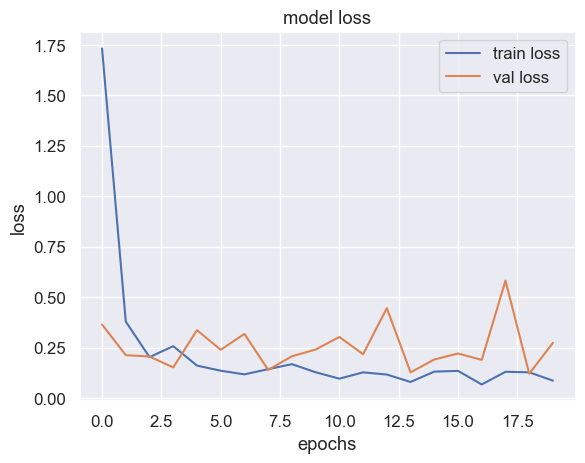

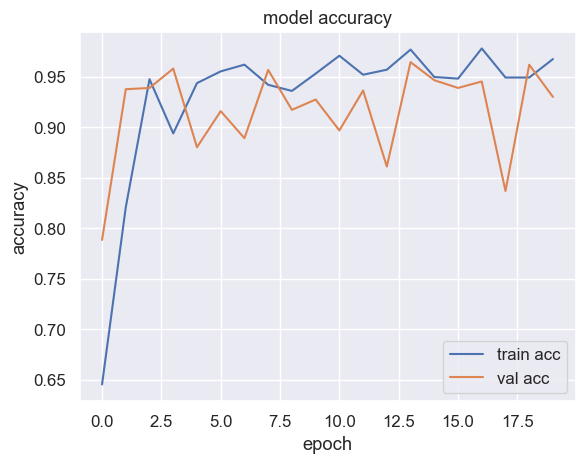

<Figure size 640x480 with 0 Axes>

In [81]:
# ploting the loss
plt.title('model loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.title('model accuracy')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.savefig('AccVal_acc')

# saving the model as a h5 file

In [82]:

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [115]:
y_pred = model.predict(test_set)

25/25 [==============================] - 103s 4s/step


In [116]:
y_pred

array([[2.8673112e-03, 9.9713266e-01],
       [9.9239749e-01, 7.6024798e-03],
       [2.1328130e-04, 9.9978667e-01],
       ...,
       [3.0108830e-02, 9.6989113e-01],
       [1.9500140e-02, 9.8049986e-01],
       [4.4513631e-01, 5.5486363e-01]], dtype=float32)

In [117]:
y_pred.argmax(axis=1)

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,

# Print validation confusion matrix

In [118]:
test_labels = test_set.classes
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
conf_matrix=confusion_matrix(test_labels, y_pred.argmax(axis=1))

[Text(0, 0.5, 'Early_bright'), Text(0, 1.5, 'Healthy')]

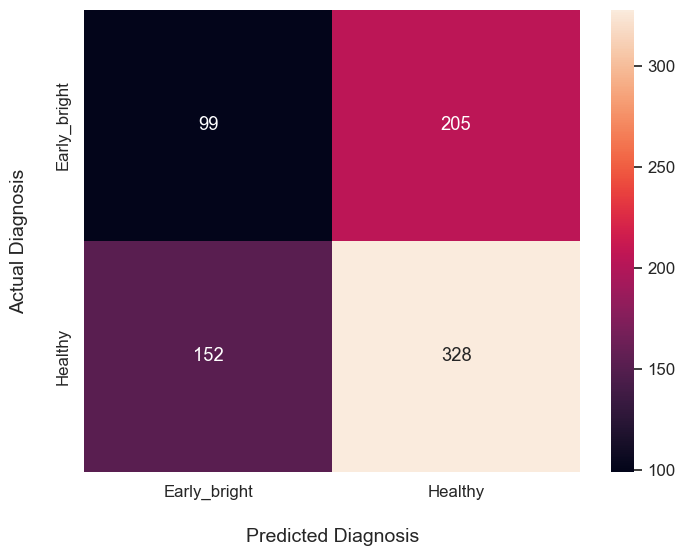

In [121]:
import seaborn as sns
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
# set x-axis label and ticks. 
ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Early_bright', 'Healthy'])
# set y-axis label and ticks
ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Early_bright', 'Healthy'])

In [89]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [90]:
y_pred


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,

# Loading model 

In [91]:

 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [92]:
model=load_model('model_resnet50.h5')

# Run prediction on a sample image

In [93]:
img=image.load_img('tomato/Test/Tomato_Early_blight/e2.JPG',target_size=(224,224))

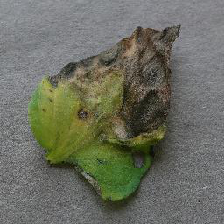

In [94]:
img


In [95]:
x=image.img_to_array(img)
x

array([[[139., 143., 146.],
        [146., 150., 153.],
        [150., 154., 157.],
        ...,
        [127., 126., 131.],
        [133., 132., 137.],
        [139., 138., 143.]],

       [[145., 149., 152.],
        [151., 155., 158.],
        [155., 159., 162.],
        ...,
        [134., 133., 138.],
        [136., 135., 140.],
        [139., 138., 143.]],

       [[136., 140., 143.],
        [141., 145., 148.],
        [144., 148., 151.],
        ...,
        [142., 141., 146.],
        [139., 138., 143.],
        [138., 137., 142.]],

       ...,

       [[ 96.,  96.,  96.],
        [ 93.,  93.,  93.],
        [101., 101., 101.],
        ...,
        [ 89.,  89.,  91.],
        [109., 109., 111.],
        [114., 114., 116.]],

       [[117., 117., 117.],
        [107., 107., 107.],
        [122., 122., 122.],
        ...,
        [ 96.,  96.,  98.],
        [119., 119., 121.],
        [138., 138., 140.]],

       [[111., 111., 111.],
        [110., 110., 110.],
        [ 95.,  

In [96]:
x.shape

(224, 224, 3)

In [97]:
x=x/255
x

array([[[0.54509807, 0.56078434, 0.57254905],
        [0.57254905, 0.5882353 , 0.6       ],
        [0.5882353 , 0.6039216 , 0.6156863 ],
        ...,
        [0.49803922, 0.49411765, 0.5137255 ],
        [0.52156866, 0.5176471 , 0.5372549 ],
        [0.54509807, 0.5411765 , 0.56078434]],

       [[0.5686275 , 0.58431375, 0.59607846],
        [0.5921569 , 0.60784316, 0.61960787],
        [0.60784316, 0.62352943, 0.63529414],
        ...,
        [0.5254902 , 0.52156866, 0.5411765 ],
        [0.53333336, 0.5294118 , 0.54901963],
        [0.54509807, 0.5411765 , 0.56078434]],

       [[0.53333336, 0.54901963, 0.56078434],
        [0.5529412 , 0.5686275 , 0.5803922 ],
        [0.5647059 , 0.5803922 , 0.5921569 ],
        ...,
        [0.5568628 , 0.5529412 , 0.57254905],
        [0.54509807, 0.5411765 , 0.56078434],
        [0.5411765 , 0.5372549 , 0.5568628 ]],

       ...,

       [[0.3764706 , 0.3764706 , 0.3764706 ],
        [0.3647059 , 0.3647059 , 0.3647059 ],
        [0.39607844, 0

In [98]:
x=np.expand_dims(x,axis=0)


In [99]:
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [100]:
img_data=abs(img_data)

img_data

array([[[[103.366455, 116.218216, 123.1349  ],
         [103.339005, 116.190765, 123.10745 ],
         [103.32332 , 116.17508 , 123.09177 ],
         ...,
         [103.42528 , 116.28488 , 123.18196 ],
         [103.40175 , 116.26135 , 123.15843 ],
         [103.37822 , 116.23782 , 123.1349  ]],

        [[103.342926, 116.19469 , 123.111374],
         [103.3194  , 116.17116 , 123.087845],
         [103.30371 , 116.15547 , 123.07216 ],
         ...,
         [103.39783 , 116.25743 , 123.15451 ],
         [103.389984, 116.24959 , 123.14667 ],
         [103.37822 , 116.23782 , 123.1349  ]],

        [[103.37822 , 116.22998 , 123.14667 ],
         [103.35861 , 116.21037 , 123.12706 ],
         [103.34685 , 116.19861 , 123.115295],
         ...,
         [103.366455, 116.22606 , 123.12314 ],
         [103.37822 , 116.23782 , 123.1349  ],
         [103.38214 , 116.241745, 123.138824]],

        ...,

        [[103.56253 , 116.40253 , 123.30353 ],
         [103.574295, 116.41429 , 123.31529 ]

In [101]:
model.predict(img_data)

1/1 [==============================] - 1s 517ms/step


array([[0.9069239 , 0.09307609]], dtype=float32)

In [102]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 82ms/step


In [103]:
if(a==1):
    print("healthy")
else:
    print("Infected by early bright")

Infected by early bright


actual label: Infected by early bright

predicted label: Infected by early bright